<a href="https://colab.research.google.com/github/MORO-66t/Air_Quality_Prediction/blob/main/Air_Quality_Prediction_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moro66","key":"82b930e6f477e7da6c00ba84fff4dae9"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d taweilo/taiwan-air-quality-data-20162024


Dataset URL: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024
License(s): CC0-1.0
taiwan-air-quality-data-20162024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip taiwan-air-quality-data-20162024.zip


Archive:  taiwan-air-quality-data-20162024.zip
replace air_quality.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: air_quality.csv         y



In [5]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("air_quality.csv")  # check real filename
df.head()

,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,...,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,...,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,...,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,...,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,...,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0


In [7]:
df.columns

Index(['date', 'sitename', 'county', 'aqi', 'pollutant', 'status', 'so2', 'co',
       'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed',
       'winddirec', 'unit', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg',
       'longitude', 'latitude', 'siteid'],
      dtype='object')

### Removed unnecassary columns included status so the target is aqi (Regression)

In [8]:
df_aqi = df[['aqi', 'pollutant', 'so2', 'co',
       'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed',
       'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']]
df_aqi.head()



,aqi,pollutant,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
0,62.0,PM2.5,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225,0.2,20.1,26.0,1.0
1,50.0,NaN,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184,0.2,15.3,23.0,1.0
2,45.0,NaN,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210,0.2,13.8,24.0,0.0
3,42.0,NaN,0.8,0.2,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239,0.2,13.0,26.0,1.0
4,50.0,NaN,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259,0.1,15.3,28.0,1.0


In [9]:
df_aqi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882208 entries, 0 to 5882207
Data columns (total 17 columns):
 #   Column     Dtype  
---  ------     -----  
 0   aqi        float64
 1   pollutant  object 
 2   so2        object 
 3   co         object 
 4   o3         object 
 5   o3_8hr     object 
 6   pm10       object 
 7   pm2.5      object 
 8   no2        object 
 9   nox        object 
 10  no         object 
 11  windspeed  object 
 12  winddirec  object 
 13  co_8hr     object 
 14  pm2.5_avg  object 
 15  pm10_avg   object 
 16  so2_avg    object 
dtypes: float64(1), object(16)
memory usage: 762.9+ MB


In [10]:
# Show missing data
missing_data = df_aqi.isnull().sum()

# Display columns with missing data
missing_data = missing_data[missing_data > 0]
print(missing_data)

aqi            43020
pollutant    3235012
so2           139768
co            113504
o3            125017
o3_8hr        131081
pm10          140358
pm2.5         131438
no2           165977
nox           169124
no            169455
windspeed     219498
winddirec     219736
co_8hr         81229
pm2.5_avg      79941
pm10_avg       89875
so2_avg       629162
dtype: int64


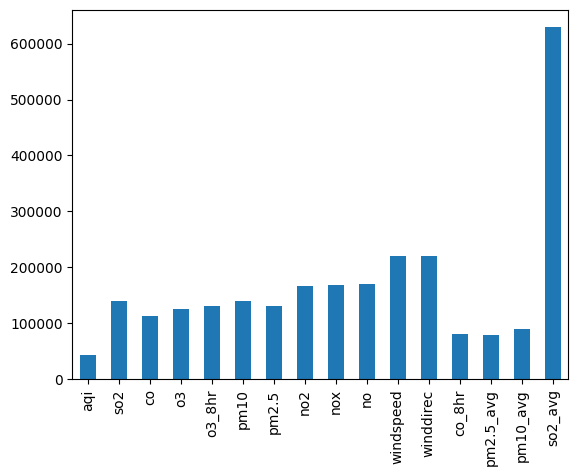

In [11]:
df_aqi_m = df_aqi.drop("pollutant",axis=1).isnull().sum().plot(kind='bar')

In [12]:
df_aqi.isnull().sum()/(df_aqi.shape[0]/100)

,0
aqi,0.731358
pollutant,54.996559
so2,2.376115
co,1.929616
o3,2.125341
o3_8hr,2.228432
pm10,2.386145
pm2.5,2.234501
no2,2.821679
nox,2.875179


In [13]:
columns_to_convert = df_aqi.columns.difference(['pollutant'])

df_aqi[columns_to_convert] = df_aqi[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [14]:
threshold = 0.11 * df_aqi.shape[0]

columns_to_drop = df_aqi.columns[df_aqi.isnull().sum() <= threshold]
columns_to_drop

Index(['aqi', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
       'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'],
      dtype='object')

In [15]:
df_aqi.dropna(subset=columns_to_drop, inplace=True)

df_aqi['pollutant'] = df_aqi['pollutant'].fillna(method='ffill')

In [16]:
df_aqi = df_aqi.head(150000)

In [17]:
df_aqi.duplicated().sum()

np.int64(0)

In [18]:
numeric_cols = df_aqi.head(1000).select_dtypes(include=['float64', 'int64']).columns
numeric_cols
Q1 = df_aqi[numeric_cols].quantile(0.25)
Q3 = df_aqi[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# # boolean mask for outliers
outlier_mask = (df_aqi[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_aqi[numeric_cols] > (Q3 + 1.5 * IQR))

# # number of outliers per column
outlier_mask.sum()

df_no_outliers = df_aqi[~outlier_mask.any(axis=1)]


In [19]:
X = df_no_outliers.drop('aqi', axis = 1)
X = pd.get_dummies(X, columns=['pollutant'], drop_first=True)
y = df_no_outliers['aqi']

In [20]:
X.columns

Index(['so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
       'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg',
       'pollutant_Ozone (8hr)', 'pollutant_PM10', 'pollutant_PM2.5',
       'pollutant_Sulfur Dioxide (SO2)'],
      dtype='object')

In [68]:
X.shape

(110884, 19)

In [69]:
X_tem_train, X_test, y_tem_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tem_train, y_tem_train, test_size=0.25, random_state=42)

In [70]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
models = {
    "LinearRegression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBRegressor": xgb.XGBRegressor(random_state=42)
}



In [121]:
# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)


In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []
# MAE, MSE, RMSE, R²
# plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred = model.predict(X_val_scaled)

    MAE = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    RMSE = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print("---------------------------")
    print(f"{name} :")
    print(f"MAE: {MAE:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {RMSE:.4f}")
    print(f"R2: {r2:.4f}")

---------------------------
LinearRegression :
MAE: 2.6787
MSE: 11.5175
RMSE: 3.3937
R2: 0.8828
---------------------------
Random Forest :
MAE: 0.0277
MSE: 0.0205
RMSE: 0.1431
R2: 0.9998
---------------------------
XGBRegressor :
MAE: 0.1016
MSE: 0.0437
RMSE: 0.2091
R2: 0.9996


Epoch 1/40
104/104 - 2s - 22ms/step - loss: 253.7148 - root_mean_squared_error: 15.9284 - val_loss: 25.5716 - val_root_mean_squared_error: 5.0568
Epoch 2/40
104/104 - 1s - 5ms/step - loss: 17.0061 - root_mean_squared_error: 4.1238 - val_loss: 11.7370 - val_root_mean_squared_error: 3.4259
Epoch 3/40
104/104 - 0s - 5ms/step - loss: 8.8651 - root_mean_squared_error: 2.9774 - val_loss: 6.7751 - val_root_mean_squared_error: 2.6029
Epoch 4/40
104/104 - 0s - 5ms/step - loss: 5.4054 - root_mean_squared_error: 2.3250 - val_loss: 4.3762 - val_root_mean_squared_error: 2.0919
Epoch 5/40
104/104 - 1s - 5ms/step - loss: 3.5168 - root_mean_squared_error: 1.8753 - val_loss: 2.8305 - val_root_mean_squared_error: 1.6824
Epoch 6/40
104/104 - 0s - 5ms/step - loss: 2.2398 - root_mean_squared_error: 1.4966 - val_loss: 1.8420 - val_root_mean_squared_error: 1.3572
Epoch 7/40
104/104 - 1s - 6ms/step - loss: 1.5168 - root_mean_squared_error: 1.2316 - val_loss: 1.3413 - val_root_mean_squared_error: 1.1581
Epoch 

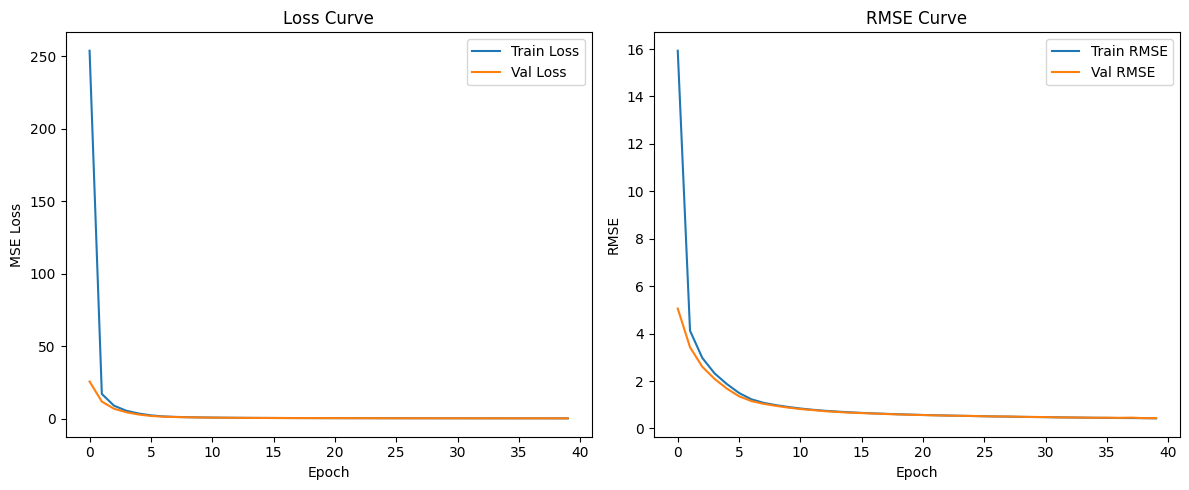

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

initializer = keras.initializers.HeNormal()   # or GlorotUniform()

model = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_initializer=initializer),
    layers.Dropout(0.2),      # 20% of neurons dropped
    layers.Dense(64, activation='relu', kernel_initializer=initializer),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu', kernel_initializer=initializer),
    layers.Dense(1)
])
model.compile(
    optimizer='adamw',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


# -----------------------------
# Train model & record curves
# -----------------------------
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.15,
    epochs=40,
    batch_size=512,
    verbose=2
)

# -----------------------------
# Plot accuracy / loss curves
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title('RMSE Curve')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_val_scaled).flatten()

# Calculate metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Neural Network Regression Metrics:")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")
# MAE : 0.4677
# MSE : 0.4224
# RMSE: 0.6500
# R²  : 0.9957


# MAE : 0.3373
# MSE : 0.1893
# RMSE: 0.4351
# R²  : 0.9981


650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network Regression Metrics:
MAE : 0.3389
MSE : 0.1947
RMSE: 0.4413
R²  : 0.9980


In [42]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.1 MB/s eta 0:00:00


In [85]:
import keras_tuner as kt

def build_hypermodel(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))


    # tune number of layers (2 to 5)
    for i in range(hp.Int("num_layers", 3, 5)):
        model.add(
            layers.Dense(
                hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])
            )
        )

    model.add(layers.Dense(1))

    # tune optimizer + learning rate
    optimizer = hp.Choice("optimizer", ["adam", "sgd", "rmsprop"])
    lr = hp.Float("learning_rate", 1e-4, 1e-1, sampling="log")

    opt_dict = {
        "adam": keras.optimizers.Adam(lr),
        "sgd": keras.optimizers.SGD(lr),
        "rmsprop": keras.optimizers.RMSprop(lr)
    }

    model.compile(
        loss="mse",
        optimizer=opt_dict[optimizer],
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


## for fine tuning i use random search to search widely then narrow the search arroud the best from randomsearch

In [84]:
!rm -rf tuning_dir/aqi_nn_tuning


In [86]:
tuner = kt.RandomSearch (
    build_hypermodel,
    objective="val_loss",
    max_trials=40,
    directory="tuning_dir",
    project_name="aqi_nn_tuning"
)

tuner.search(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=20,
    batch_size=512
)


Trial 40 Complete [00h 00m 24s]
val_loss: 0.3415256440639496

Best val_loss So Far: 0.19047367572784424
Total elapsed time: 00h 20m 19s


In [87]:
best_model_NN = tuner.get_best_models(1)[0]
best_model_NN.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 160)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        36,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        43,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,929 (378.63 KB)

 Trainable params: 96,929 (378.63 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
best_model_NN, best_hyperparameters = tuner.get_best_models(1)[0], tuner.get_best_hyperparameters(1)[0]
best_hyperparameters.values

{'num_layers': 5,
 'units_0': 160,
 'activation': 'relu',
 'units_1': 224,
 'units_2': 192,
 'optimizer': 'adam',
 'learning_rate': 0.01153198122911648,
 'units_3': 64,
 'units_4': 32}

In [89]:
y_pred = best_model_NN.predict(X_val_scaled).flatten()

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Neural Network Regression Metrics:")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

650/650 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Regression Metrics:
MAE : 0.3453
MSE : 0.1942
RMSE: 0.4407
R²  : 0.9980


In [ ]:

# ---------------------------
# Random Forest :
# MAE: 0.0277
# MSE: 0.0205
# RMSE: 0.1431
# R2: 0.9998
# ---------------------------
# XGBRegressor :
# MAE: 0.1016
# MSE: 0.0437
# RMSE: 0.2091
# R2: 0.9996

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test).flatten() if hasattr(model, "predict") else model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Metrics:")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")

    return (name , y_pred)


In [144]:
f = {}
for name , model  in models.items():
    f[name] = evaluate_model(model, X_test_scaled, y_test,name=name)
y_pred_nn   = evaluate_model(best_model_NN, X_test_scaled, y_test, "Neural Network")




LinearRegression Metrics:
MAE : 2.6952
MSE : 11.5828
RMSE: 3.4034
R²  : 0.8826

Random Forest Metrics:
MAE : 0.0263
MSE : 0.0181
RMSE: 0.1345
R²  : 0.9998

XGBRegressor Metrics:
MAE : 0.0984
MSE : 0.0411
RMSE: 0.2027
R²  : 0.9996
867/867 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Neural Network Metrics:
MAE : 0.3450
MSE : 0.1940
RMSE: 0.4404
R²  : 0.9980


In [147]:
y_pred_rf = f["Random Forest"][1]
y_pred_xgb = f["XGBRegressor"][1]

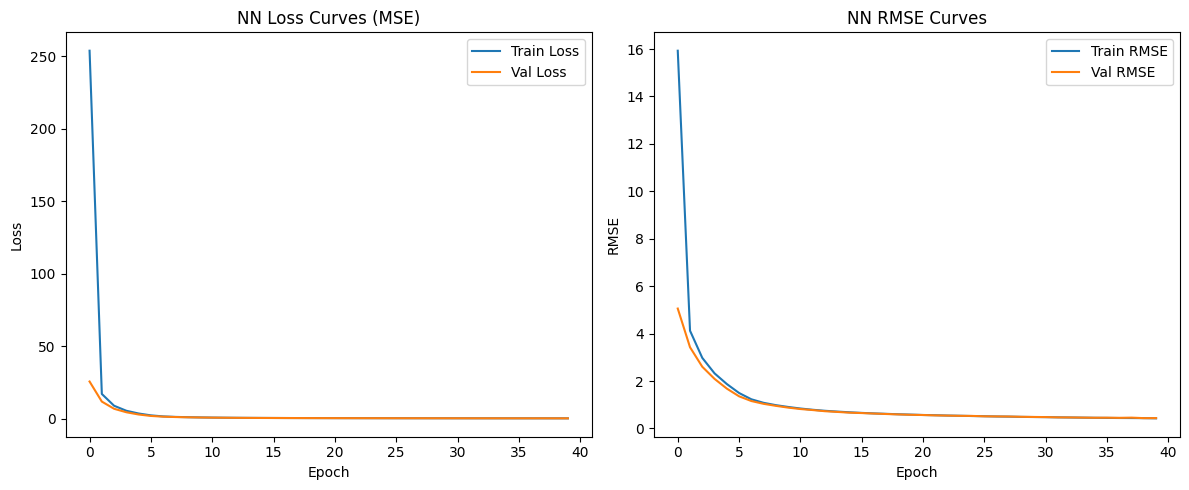

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("NN Loss Curves (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# RMSE
plt.subplot(1,2,2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.title("NN RMSE Curves")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()

plt.tight_layout()
plt.show()


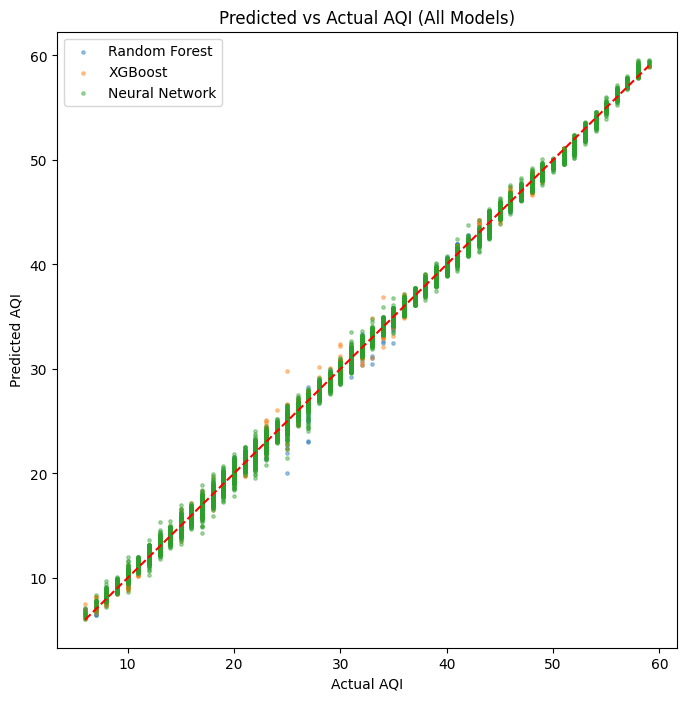

In [150]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rf, s=6, alpha=0.4, label="Random Forest")
plt.scatter(y_test, y_pred_xgb, s=6, alpha=0.4, label="XGBoost")
plt.scatter(y_test, y_pred_nn[1], s=6, alpha=0.4, label="Neural Network")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicted vs Actual AQI (All Models)")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.legend()
plt.show()

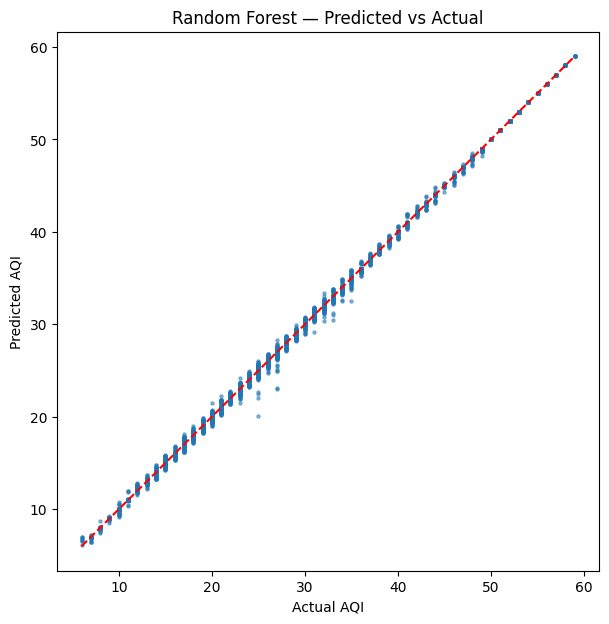

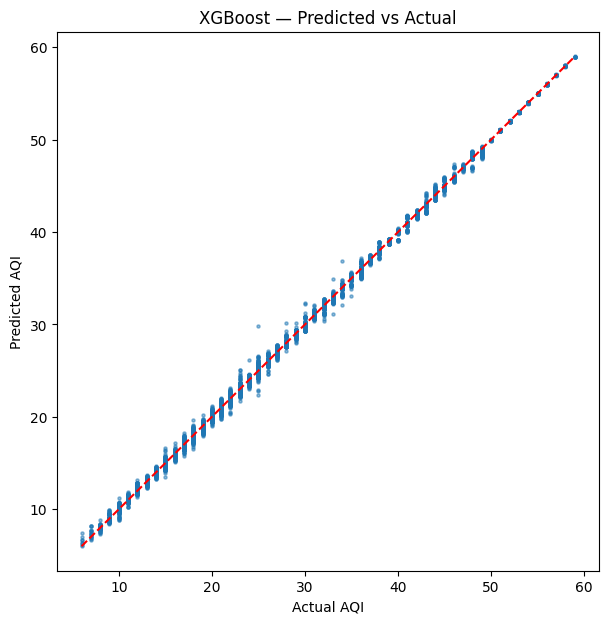

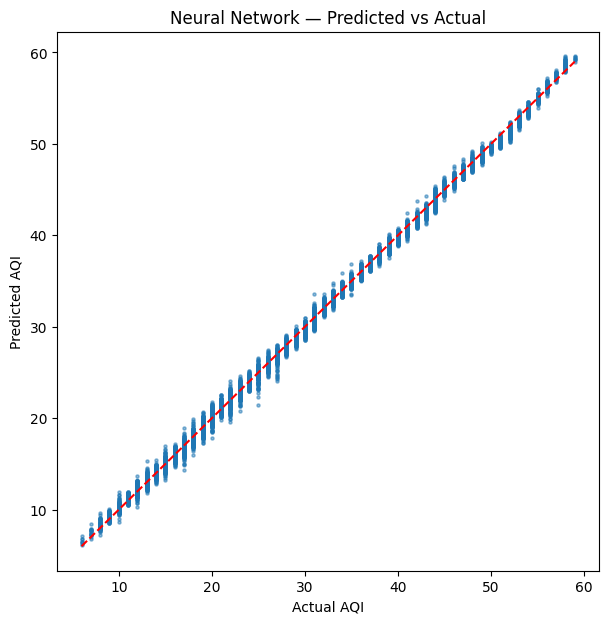

In [153]:
def plot_single(y_test, y_pred, name):
    plt.figure(figsize=(7,7))
    plt.scatter(y_test, y_pred, s=5, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name} — Predicted vs Actual")
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.show()

plot_single(y_test, y_pred_rf,  "Random Forest")
plot_single(y_test, y_pred_xgb, "XGBoost")
plot_single(y_test, y_pred_nn[1],  "Neural Network")

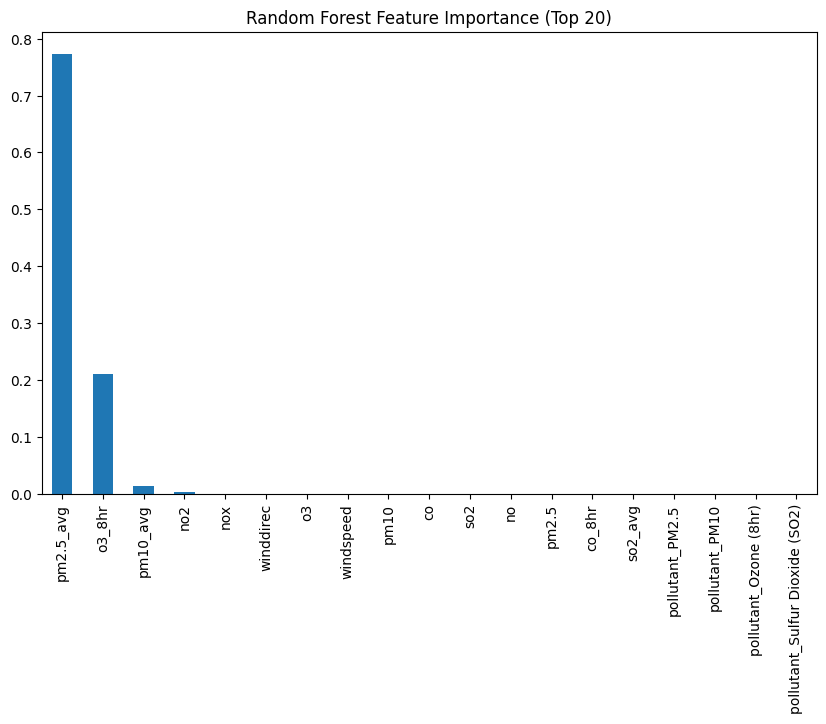

In [155]:
import pandas as pd

importances = pd.Series(models["Random Forest"].feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances[:20].plot(kind="bar")
plt.title("Random Forest Feature Importance (Top 20)")
plt.show()

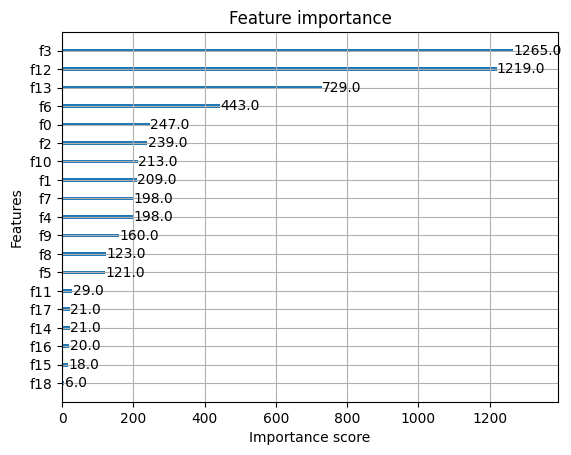

In [159]:
xgb.plot_importance(models["XGBRegressor"], max_num_features=20)
plt.show()